### Coefficient

* method: Pearson's correlation coefficient (r)
* visualization: scatter, jointplot

Pearson's correlation coefficient can explain better on normal distributed data

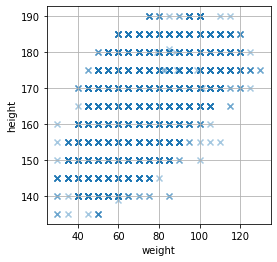

[[1.         0.68664499]
 [0.68664499 1.        ]]
0.6866449937651706


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('data/smoking.csv', index_col=0)

X = df[['weight(kg)','height(cm)']].to_numpy()

plt.figure(figsize=(4,4))
plt.scatter(*X.T, marker='x', alpha=.4)
plt.xlabel('weight')
plt.ylabel('height')
plt.grid()
plt.show()

r = np.multiply(*(X - X.mean(axis=0)).T).mean() / np.multiply(*np.sqrt(((X - X.mean(axis=0))**2).mean(axis=0)))

print(np.corrcoef(*X.T))
print(r)

#### Normality test

* method: Shapiro-Wilk, Kolmogorov-Smirnov
* visualization: QQ-plot

##### Shaprio-Wilk
$H_0$: 정규분포를 따른다.
$H_1$: 정규분포를 따르지 않는다.

In [64]:
from scipy import stats

W, p_value = stats.shapiro(np.random.choice(X.T[0], size=100, replace=True))

print(f"{p_value = :.5f}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: The data appears to be normally distributed.")
else:
    print("Reject the null hypothesis: The data does not appear to be normally distributed.")

p_value = 0.00772
Reject the null hypothesis: The data does not appear to be normally distributed.


#### QQ-plot

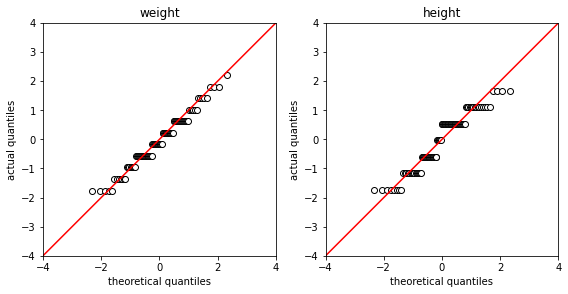

In [282]:
from scipy.stats import norm

Z = (X - X.mean(axis=0)) / X.std(axis=0)
Z_weight, Z_height = Z.T
Z_weight = np.sort(Z_weight)
Z_height = np.sort(Z_height)

def qqplot(Z, ax):
    theoretical_quantiles = np.linspace(0, 1, len(Z))
    standard_normal_quantiles = norm.ppf(theoretical_quantiles) # inverse of cdf
    ax.scatter(standard_normal_quantiles, Z, edgecolors='k', c='white')
    ax.plot([-100,100],[-100,100], c='r')
    ax.axis('square')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_xlabel('theoretical quantiles')
    ax.set_ylabel('actual quantiles')

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].set_title('weight')
qqplot(np.sort(np.random.choice(Z_weight, size=100, replace=False)), ax[0])

ax[1].set_title('height')
qqplot(np.sort(np.random.choice(Z_height, size=100, replace=False)), ax[1])

plt.tight_layout()
plt.show()

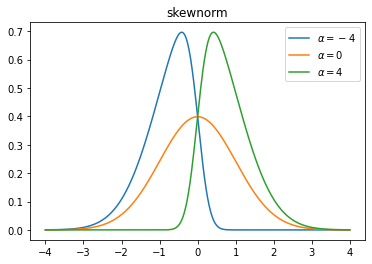

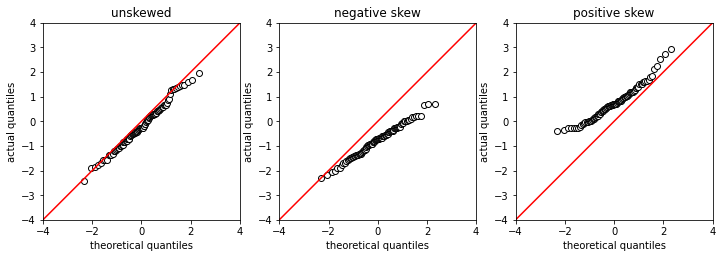

In [284]:
from scipy.stats import skewnorm
from scipy.stats import t
from scipy.stats import laplace

# skew normal
x = np.linspace(-4,4,401)
plt.title('skewnorm')
plt.plot(x, skewnorm.pdf(x=x, a=-4), label=r'$\alpha=-4$') # neg skew
plt.plot(x, skewnorm.pdf(x=x, a= 0), label=r'$\alpha= 0$')
plt.plot(x, skewnorm.pdf(x=x, a= 4), label=r'$\alpha= 4$') # pos skew
plt.legend()
plt.show()

fig, ax = plt.subplots(1,3,figsize=(12,4))

Z = skewnorm.rvs(0, loc=0, scale=1, size=100)
Z = np.sort(Z)
ax[0].set_title('unskewed')
qqplot(Z, ax[0])

Z = skewnorm.rvs(-2, loc=0, scale=1, size=100)
Z = np.sort(Z)
ax[1].set_title('negative skew')
qqplot(Z, ax[1])

Z = skewnorm.rvs(2, loc=0, scale=1, size=100)
Z = np.sort(Z)
ax[2].set_title('positive skew')
qqplot(Z, ax[2])
plt.show()


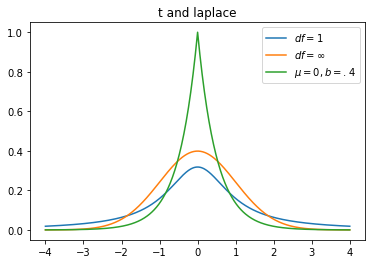

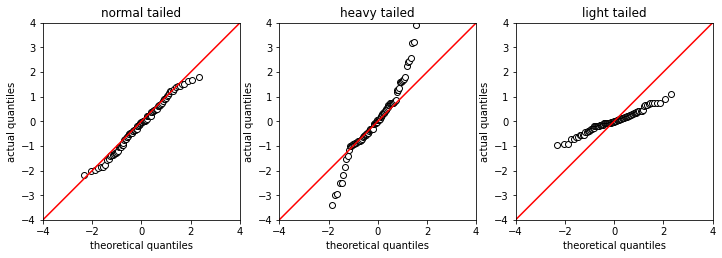

In [285]:

# t (heavy tail) and laplace (light tail)
# as df in t gets larger, the distribution approaches to normal dist
x = np.linspace(-4,4,401)
plt.title('t and laplace')
plt.plot(x, t.pdf(x=x, df=1), label=r'$df=1$') # heavy tail
plt.plot(x, t.pdf(x=x, df=1000), label=r'$df=\infty$') # normal tail
plt.plot(x, laplace.pdf(x=x, loc=0, scale=.5), label=r'$\mu=0, b=.4$')
plt.legend()
plt.show()

fig, ax = plt.subplots(1,3,figsize=(12,4))

Z = t.rvs(df=1000, size=100)
Z = np.sort(Z)
ax[0].set_title('normal tailed')
qqplot(Z, ax[0])

Z = t.rvs(df=1, size=100)
Z = np.sort(Z)
ax[1].set_title('heavy tailed')
qqplot(Z, ax[1])

Z = laplace.rvs(0, .4, size=100)
Z = np.sort(Z)
ax[2].set_title('light tailed')
qqplot(Z, ax[2])